In [ ]:
#Problem Statement
#The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
#Also, certain attributes of each product and store have been defined. 
#The aim is to build a predictive model and find out the sales of each product at a particular store.
#Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#We have train (8523) and test (5681) data set, train data set has both input and output variable(s). 
#We need to predict the sales for test data set. 

#Data Dictionary
Variable                          Description

Item_Identifier                   Unique product ID

Item_Weight                       Weight of product

Item_Fat_Content                  Whether the product is low fat or not

Item_Visibility                   The % of total display area of all products in a store allocated to the particular product

Item_Type                         The category to which the product belongs

Item_MRP                          Maximum Retail Price (list price) of the product

Outlet_Identifier                 Unique store ID

Outlet_Establishment_Year         The year in which store was established

Outlet_Size                       The size of the store in terms of ground area covered

Outlet_Location_Type              The type of city in which the store is located

Outlet_Type                       Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales                 Sales of the product in the particulat store. This is the outcome variable to be predicted.

#Evaluation Metric
Evaluation Metric:

Our model performance will be evaluated on the basis of our prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Our submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual sales for the test dataset, against which our predictions will be evaluated. We will use the Root Mean Square Error value to judge our response.

Where,
N: total number of observations
Predicted: the response entered by user
Actual: actual values of sales

Also, note that the test data is further divided into Public (25%) and Private (75%) data. Our initial responses will be checked and scored on the Public data. But, the final rankings will be based on score on Private data set. Since this is a practice problem, we will keep declare winners after specific time intervals and refresh the competition.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

#View graph in the same notebook.Customize look and feel.
%pylab inline 
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn.metrics as skmetrics

In [3]:
dir(skmetrics)

['SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'base',
 'brier_score_loss',
 'calinski_harabaz_score',
 'classification',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_similarity_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'mean_squared_log_error',
 'median_absolute_error',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'pa

In [5]:
import sklearn.preprocessing as skpreprocess

In [6]:
dir(skpreprocess)

['Binarizer',
 'FunctionTransformer',
 'Imputer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'PolynomialFeatures',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_function_transformer',
 'add_dummy_feature',
 'binarize',
 'data',
 'imputation',
 'label',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'quantile_transform',
 'robust_scale',
 'scale']

In [7]:
#linear reg model
import sklearn.linear_model as sklr

In [8]:
dir(sklr)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',

The Train file contains 11 independent variables and 1 target variable, i.e., Item_Outlet_Sales.
The Test file also contains the same set of independent variables, but there is no target variable because that is what we have to predict.
The Sample Submissions file contains the format in which we have to submit our predictions.

In [481]:
#Import data
bigmart_sales_train=pd.read_csv('Train_UWu5bXk.csv')
bigmart_sales_test=pd.read_csv('Test_u94Q5KV.csv')
bigmart_submission=pd.read_csv('SampleSubmission_TmnO39y.csv')

In [203]:
#Understand the data
bigmart_sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [204]:
bigmart_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Combine Train and Test
To explore data in any data science competition, it is advisable to append test data to the train data. Combining train and test sets saves a lot of time and effort because if we have to make any modification in the data, we would make the change only in the combined data and not in train and test data separately. Later we can always split the combined data back to train and test.

For example, if we wish to multiply Item_Fat_Content variable by 100, we can do it for the train and test data separately or we can do the same operation once for the combined dataset. The latter approach is more efficient when there are a lot of changes to be made.

So, we will go ahead combine both train and test data and will carry out data visualization, feature engineering, one-hot encoding, and label encoding. Later we would split this combined data back to train and test datasets.

In [482]:
bigmart_sales_train['Train/Test']='Train'

In [483]:
bigmart_sales_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Train/Test
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [484]:
bigmart_sales_test['Train/Test']='Test'

In [485]:
bigmart_sales_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Train/Test
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,Test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,Test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Test


In [487]:
bigmart_sales=bigmart_sales_train.append(bigmart_sales_test)

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [488]:
check=bigmart_sales.loc[bigmart_sales['Train/Test']=='Test']

In [489]:
check.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test
0,Low Fat,FDW58,107.8622,NaN,Snack Foods,0.007565,20.750,1999,OUT049,Tier 1,Medium,Supermarket Type1,Test
1,reg,FDW14,87.3198,NaN,Dairy,0.038428,8.300,2007,OUT017,Tier 2,NaN,Supermarket Type1,Test
2,Low Fat,NCN55,241.7538,NaN,Others,0.099575,14.600,1998,OUT010,Tier 3,NaN,Grocery Store,Test
3,Low Fat,FDQ58,155.0340,NaN,Snack Foods,0.015388,7.315,2007,OUT017,Tier 2,NaN,Supermarket Type1,Test
4,Regular,FDY38,234.2300,NaN,Dairy,0.118599,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,Test


In [490]:
#Get information of the combined table
bigmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
Train/Test                   14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [ ]:
#Detailed profiling using pandas profiling for Univariate analysis
pandas_profiling.ProfileReport(bigmart_sales_train)

In [39]:
bigmart_sales_profile=pandas_profiling.ProfileReport(bigmart_sales_train)

In [59]:
bigmart_salescombi_profile=pandas_profiling.ProfileReport(bigmart_sales)

In [60]:
#Download detailed profiling using pandas profiling
#bigmart_sales_profile.to_file(outputfile = "bigmart_sales_profile.html")
bigmart_salescombi_profile.to_file(outputfile='bigmart_salescombi_profile.html')

In [491]:
#Retrive the list of numeric & categorical variables
dict(bigmart_sales_train.dtypes)

{'Item_Fat_Content': dtype('O'),
 'Item_Identifier': dtype('O'),
 'Item_MRP': dtype('float64'),
 'Item_Outlet_Sales': dtype('float64'),
 'Item_Type': dtype('O'),
 'Item_Visibility': dtype('float64'),
 'Item_Weight': dtype('float64'),
 'Outlet_Establishment_Year': dtype('int64'),
 'Outlet_Identifier': dtype('O'),
 'Outlet_Location_Type': dtype('O'),
 'Outlet_Size': dtype('O'),
 'Outlet_Type': dtype('O'),
 'Train/Test': dtype('O')}

In [492]:
numeric_var = [key for key in dict(bigmart_sales_train.dtypes) if dict(bigmart_sales_train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(bigmart_sales_train.dtypes) if dict(bigmart_sales_train.dtypes)[key] in ['object']]
print('Numeric Variables:',numeric_var)
print('Categorical Variables:',cat_var)

Numeric Variables: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical Variables: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Train/Test']


In [493]:
numeric_var

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [494]:
bigmart_sales_num=bigmart_sales[numeric_var]
bigmart_sales_cat=bigmart_sales[cat_var]

In [495]:
bigmart_sales_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [214]:
edd_num=bigmart_sales_num.describe()
edd_num.T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [63]:
edd_num.to_csv('NumericVars_Edd.csv')

In [215]:
edd_cat=bigmart_sales_cat.describe()
edd_cat.T

,count,unique,top,freq
Item_Identifier,14204,1559,FDQ12,10
Item_Fat_Content,14204,5,Low Fat,8485
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,10188,3,Medium,4655
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294
Train/Test,14204,2,Train,8523


In [65]:
edd_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Train/Test
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDQ12,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,Train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [ ]:
#From the profile generated, we have the below observations:
#1. LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. 
#Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again

#2.

In [496]:
bigmart_sales.loc[bigmart_sales.Item_Fat_Content=='LF','Item_Fat_Content']='Low Fat'

In [497]:
bigmart_sales.loc[bigmart_sales.Item_Fat_Content=='low fat','Item_Fat_Content']='Low Fat'

In [498]:
bigmart_sales.loc[bigmart_sales.Item_Fat_Content=='reg','Item_Fat_Content']='Regular'

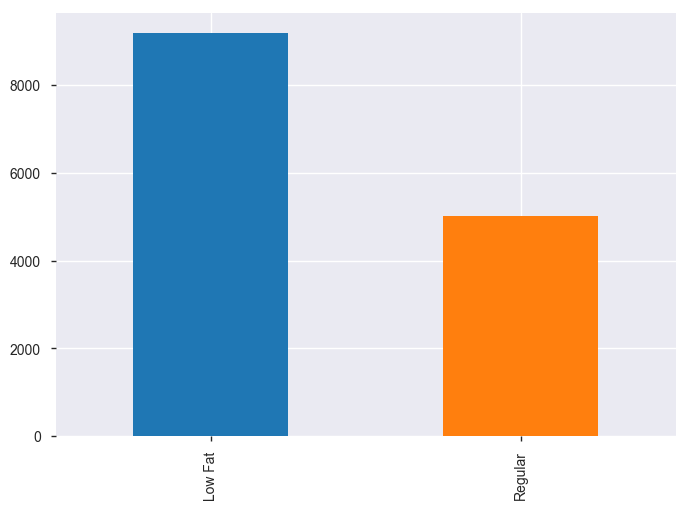

In [499]:
bigmart_sales['Item_Fat_Content'].value_counts().plot.bar()

#Insights from combined data profiling
1. Item fat content has 2 values Low Fat and Regular
2. % of low fat items > regular items sold
2. Item sales is heavily right skewed
3. For ietm type, fruits and vegetables have max freqency

Fruits and Vegetables	2013	14.2%	 
Snack Foods	1989	14.0%	 
Household	1548	10.9%	 
Frozen Foods	1426	10.0%	 
Dairy	1136	8.0%	 
Baking Goods	1086	7.6%	 
Canned	1084	7.6%	 
Health and Hygiene	858	6.0%	 
Meat	736	5.2%	 
Soft Drinks	726	5.1%	 
Other values (6)	1602	11.3%

4. max items have very low visible area
5. max no. of stores were established in 1987
1985	2439	17.2%	 
1987	1553	10.9%	 
1999	1550	10.9%	 
1997	1550	10.9%	 
2004	1550	10.9%	 
2002	1548	10.9%	 
2009	1546	10.9%	 
2007	1543	10.9%	 
1998	925	6.5%

6. Location Type
Tier 3	5583	39.3%	 
Tier 2	4641	32.7%	 
Tier 1	3980	28.0%

7. Outlet Size
Supermarket Type1	9294
Grocery Store	  1805
Supermarket Type3	  1559

8. Outlet size 
Medium	4655
Small	3980
High	1553
(Missing)	

Variables with missing values:

1. Item weight
2. Outlet size


In [90]:
#Bivariate analysis
#First we take numerical variable

def create_scatterplots(varlist,y):
    for index in varlist:
        bigmart_sales.plot.scatter(index,y)
   

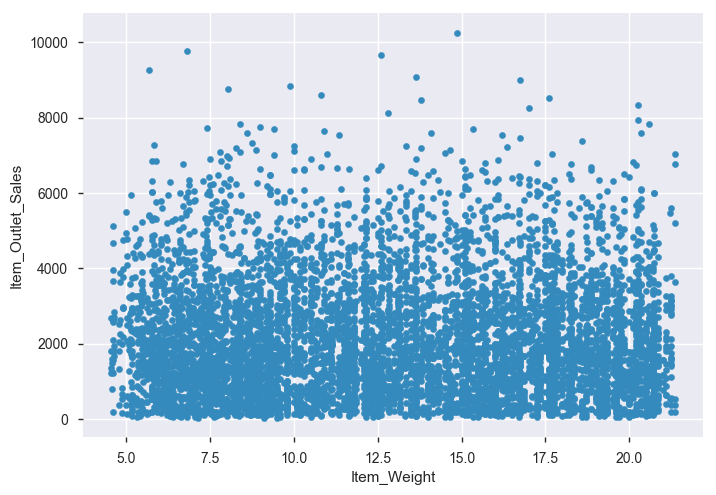

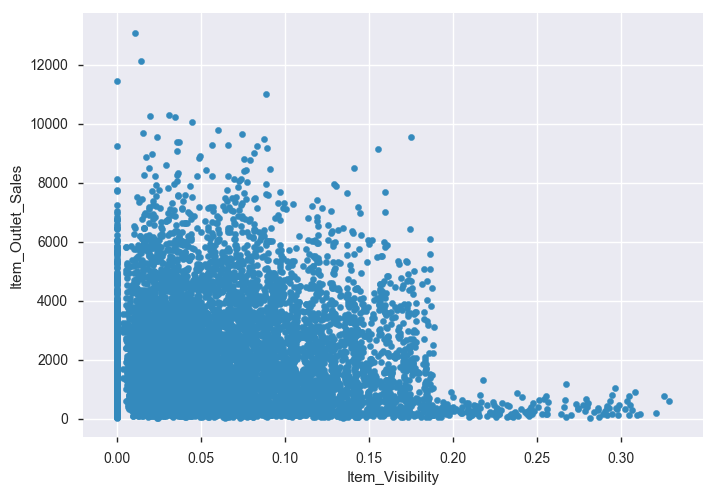

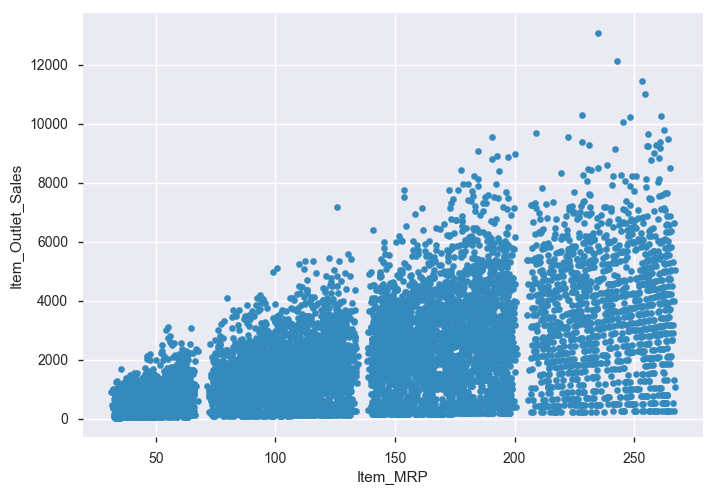

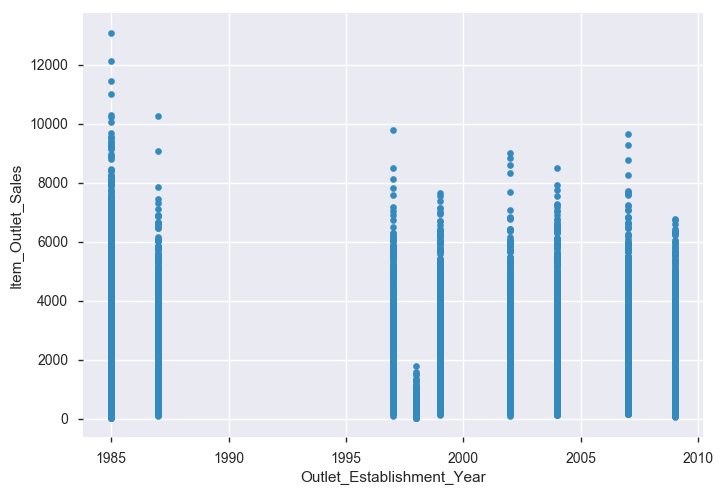

In [91]:
create_scatterplots(numeric_var[:-1],'Item_Outlet_Sales')

Observations

1. Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.
2. In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.
3. In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

In [121]:
#Now we plot violin plots for categorical vs response variable
def create_violinplot(catvar,Y):

    n=1
    for item in catvar:
        fig = plt.figure(figsize=(11, 8))
        plt.figure(n)
        #ax = fig.add_subplot(coordinates)
        sns.violinplot(x=item,y=Y,data=bigmart_sales,nan=True)
        n=n+1

In [94]:
cat_var

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Train/Test']

In [102]:
cat_var[1:len(cat_var)-1]

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


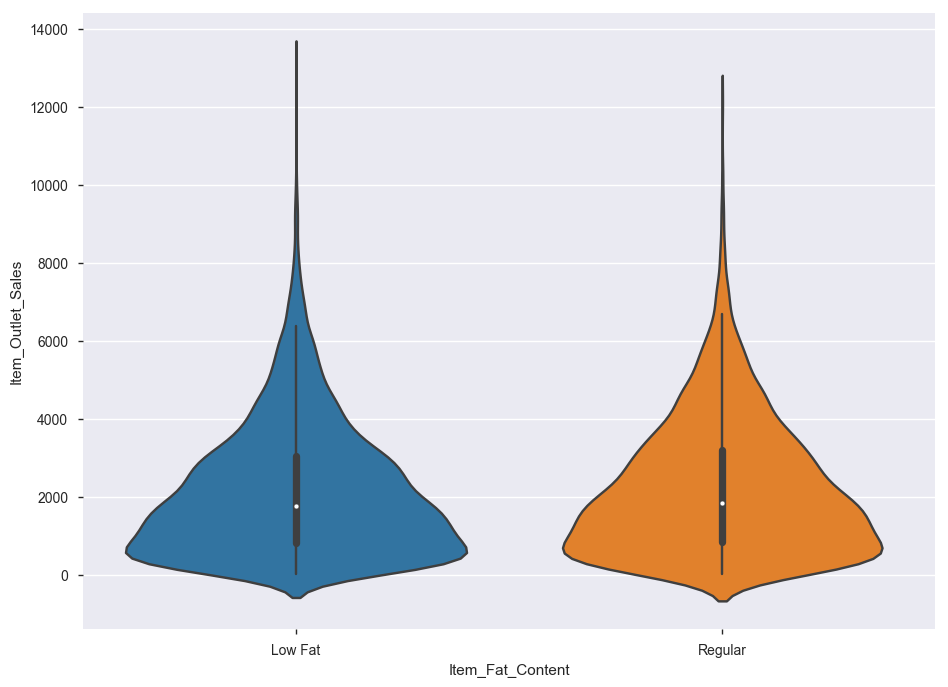

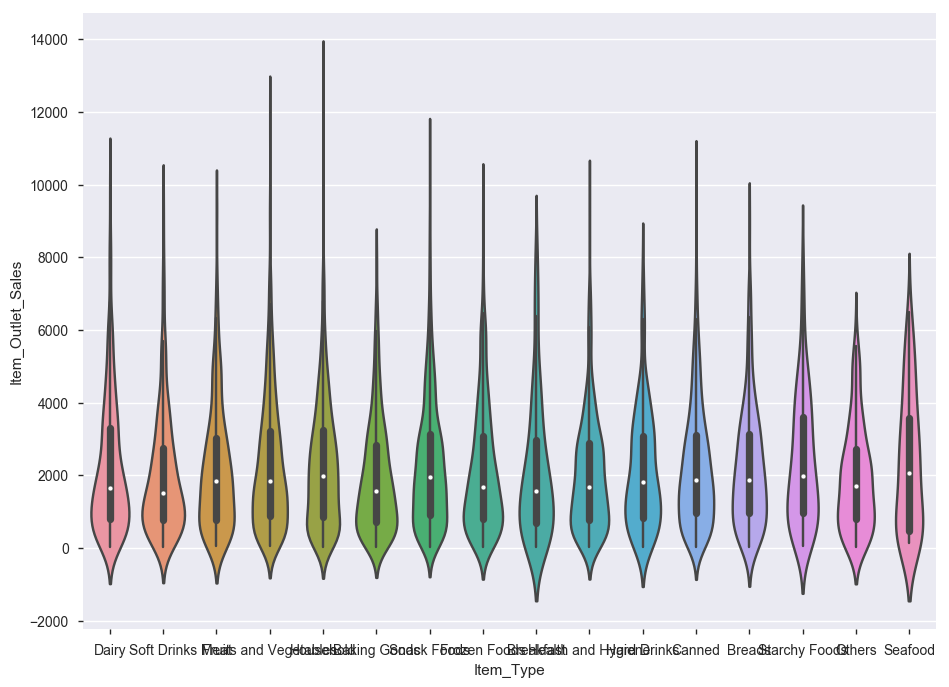

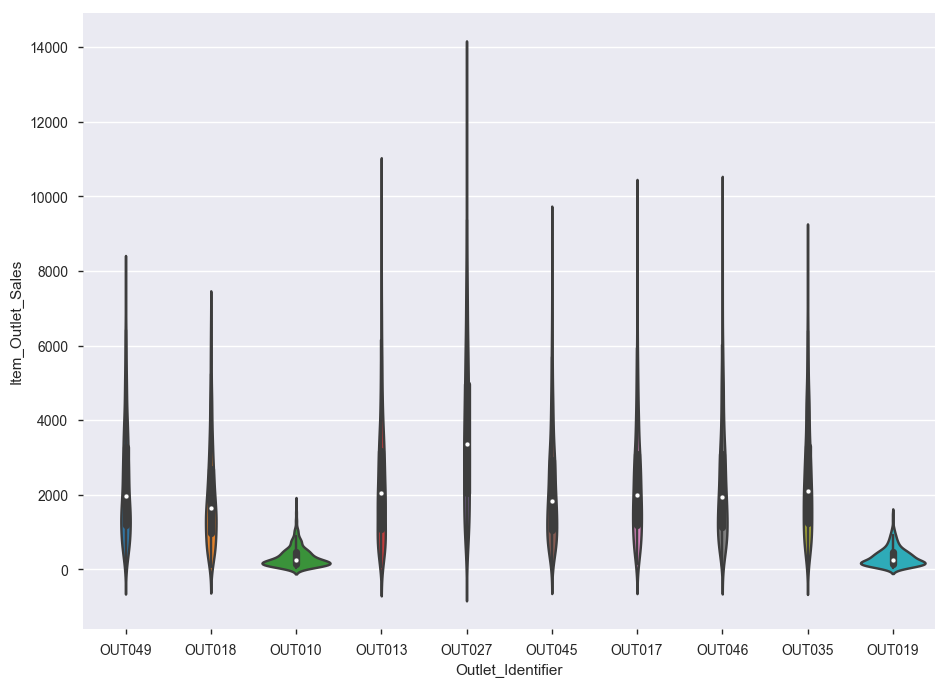

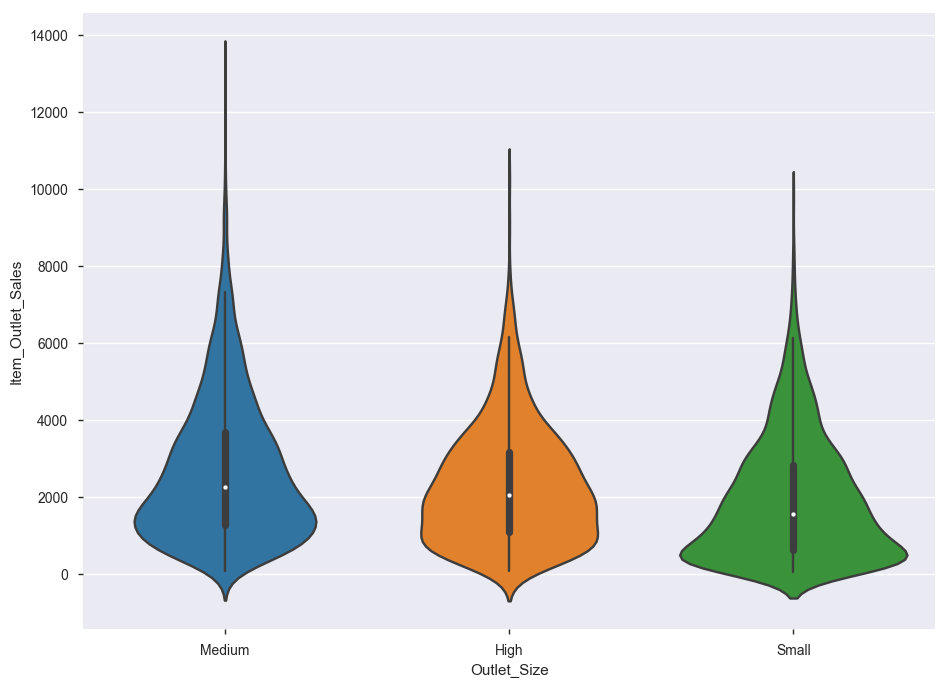

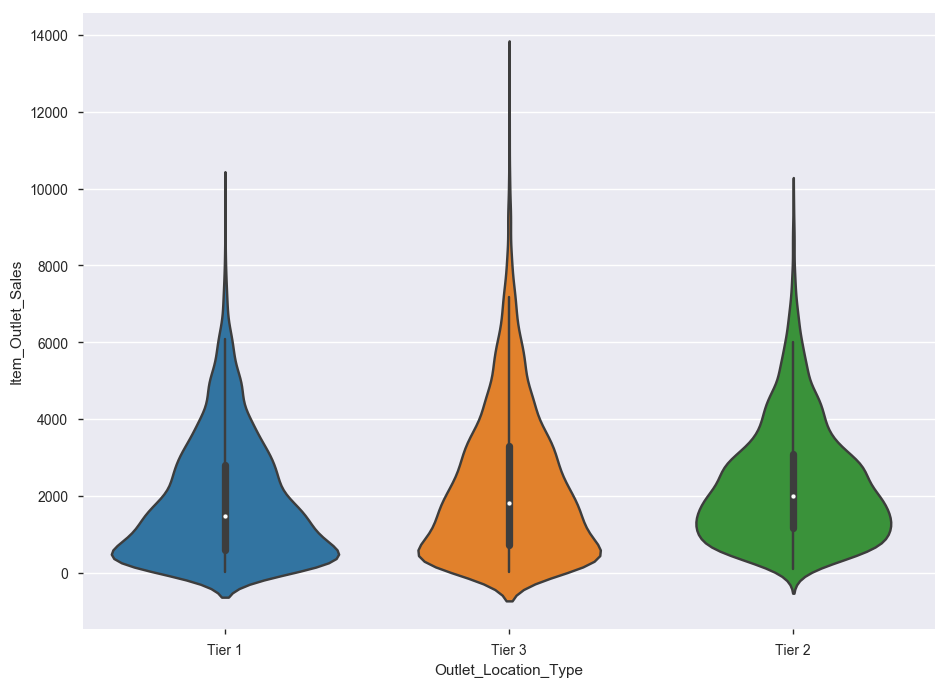

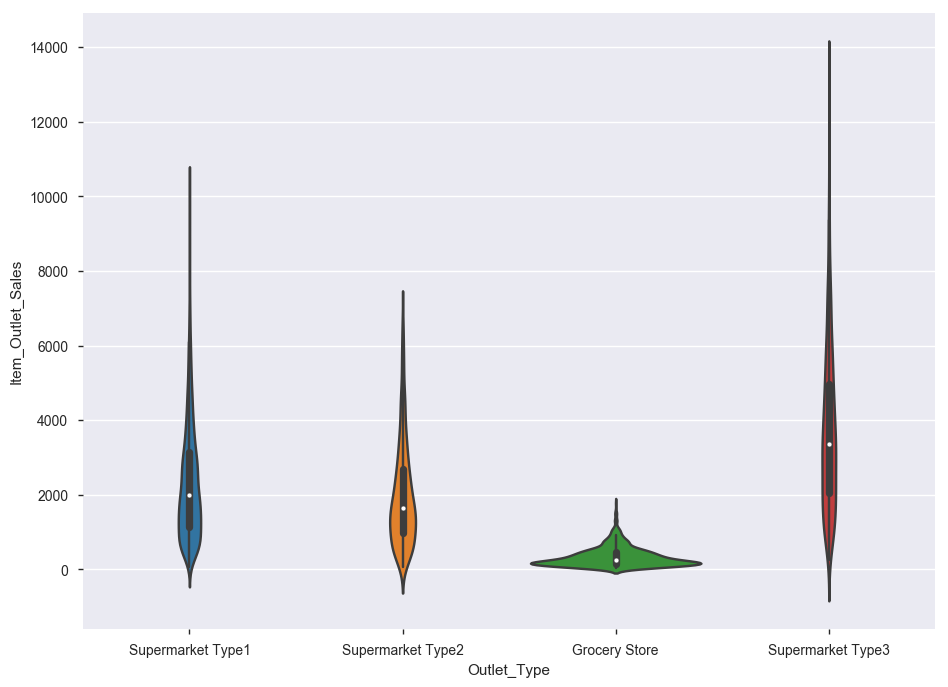

In [122]:
create_violinplot(cat_var[1:len(cat_var)-1],'Item_Outlet_Sales')

Observations

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct and same is the case with Item_Fat_Content.
The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.
In the univariate analysis, we came to know about the empty values in Outlet_Size variable. Let’s check the distribution of the target variable across Outlet_Size.

Observations

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.
In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.


#Missing data treatment
Missing data can have a severe impact on building predictive models because the missing values might be contain some vital information which could help in making better predictions. So, it becomes imperative to carry out missing data imputation. There are different methods to treat missing values based on the problem and the data. Some of the common techniques are as follows:

Deletion of rows: In train dataset, observations having missing values in any variable are deleted. The downside of this method is the loss of information and drop in prediction power of model.

Mean/Median/Mode Imputation: In case of continuous variable, missing values can be replaced with mean or median of all known values of that variable. For categorical variables, we can use mode of the given values to replace the missing values.

Building Prediction Model: We can even make a predictive model to impute missing data in a variable. Here we will treat the variable having missing data as the target variable and the other variables as predictors. We will divide our data into 2 datasets—one without any missing value for that variable and the other with missing values for that variable. The former set would be used as training set to build the predictive model and it would then be applied to the latter set to predict the missing values.

In [500]:
#we have missing values in Item_Weight and Item_Outlet_Sales. Missing data in Item_Outlet_Sales can be ignored since they belong to the test dataset. 
#We’ll now impute Item_Weight with mean weight based on the Item_Identifier variable.
bigmart_sales['Item_Weight'] = bigmart_sales['Item_Weight'].fillna(bigmart_sales.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [501]:
bigmart_sales['Item_Weight'].isna().sum()

0

In [502]:
#Similarly, zeroes in Item_Visibility variable can be replaced with Item_Identifier wise mean values of Item_Visibility. 
#It can be visualized in the plot below.
bigmart_sales_temp = bigmart_sales.copy()

In [503]:
#Replace 0's with nan
bigmart_sales_temp['Item_Visibility'] = bigmart_sales_temp['Item_Visibility'].replace(0, np.nan)

In [504]:
bigmart_sales_temp['Item_Visibility'] = bigmart_sales_temp['Item_Visibility'].fillna(bigmart_sales_temp.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [505]:
check=bigmart_sales_temp.loc[bigmart_sales_temp['Item_Visibility']==0]

In [506]:
check.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test


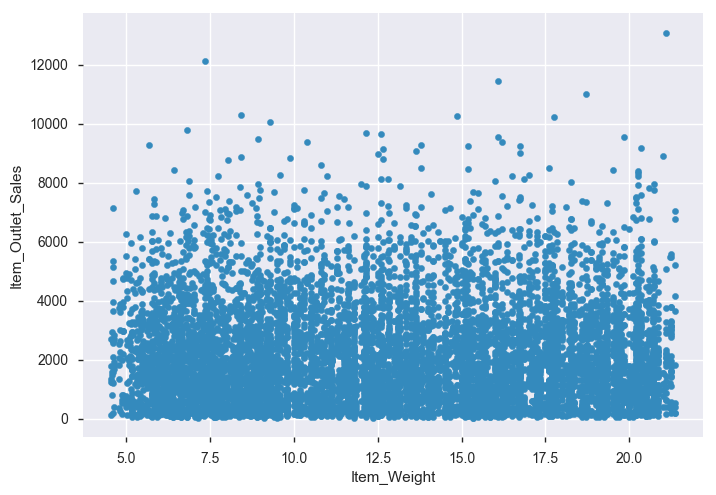

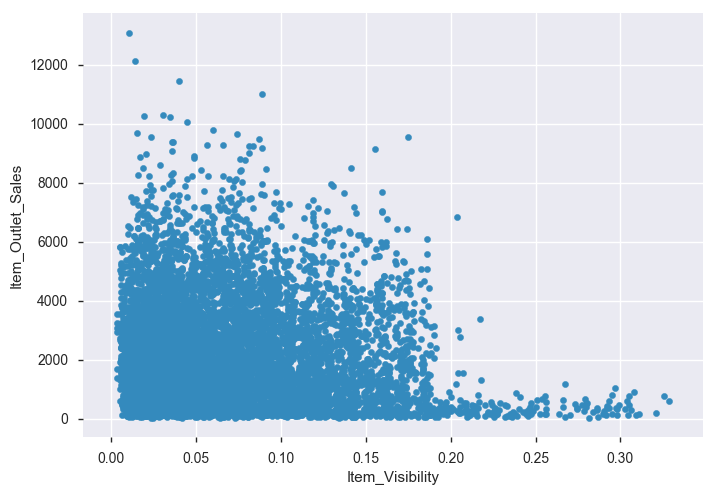

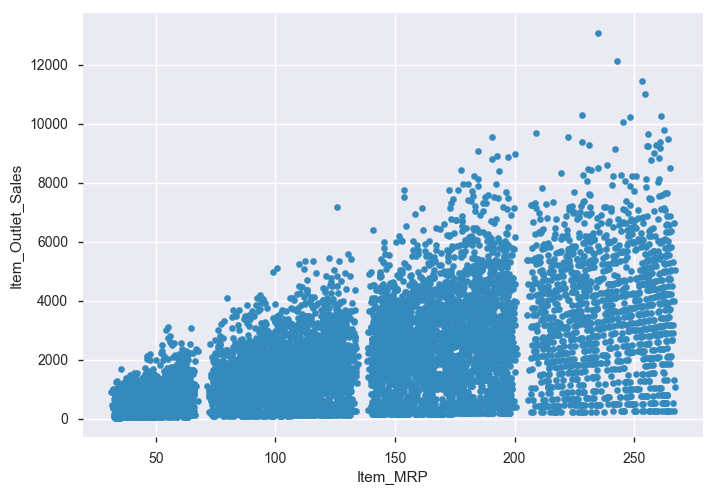

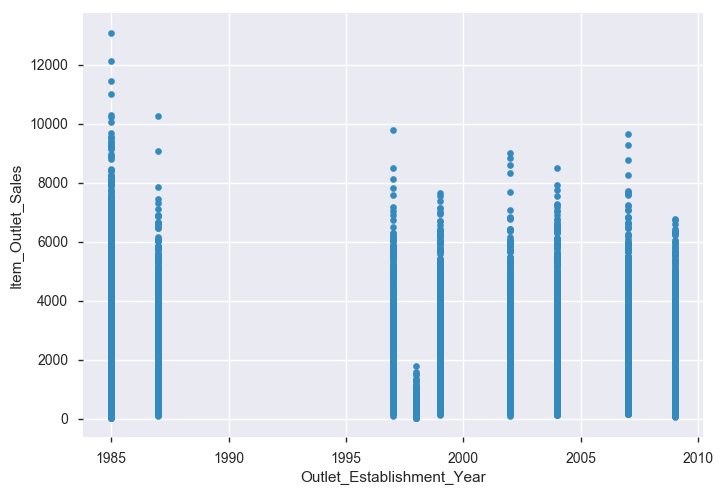

In [145]:
create_scatterplots(numeric_var[:-1],'Item_Outlet_Sales')

In [507]:
bigmart_sales=bigmart_sales_temp.copy()

In [508]:
bigmart_sales_temp.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


(array([4237., 3939., 2693., 1651.,  981.,  447.,  114.,   63.,   50.,
          29.]),
 array([0.0035747 , 0.03605632, 0.06853795, 0.10101957, 0.1335012 ,
        0.16598282, 0.19846445, 0.23094607, 0.2634277 , 0.29590932,
        0.32839095]),
 <a list of 10 Patch objects>)

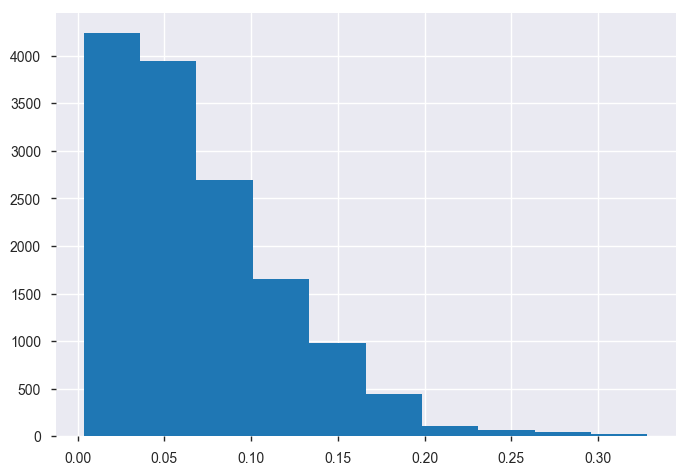

In [400]:
sns.plt.hist(bigmart_sales['Item_Visibility'])

Feature Engineering

Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.

In this section we will create the following new features:

Item_Type_new: Broader categories for the variable Item_Type.
Item_category: Categorical variable derived from Item_Identifier.
Outlet_Years: Years of operation for outlets.
price_per_unit_wt: Item_MRP/Item_Weight
Item_MRP_clusters: Binned feature for Item_MRP.

In [401]:
#create a function to We can have a look at the Item_Type variable and classify the categories into perishable and 
#non_perishable as per our understanding and make it into a new feature. 

def item_category(x):
    if x in ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]:
        return("perishable")
    elif x in ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]: 
        return("non-persihable")
    else:
        return("others")

In [509]:
bigmart_sales['Item_Type_new']=bigmart_sales['Item_Type'].apply(lambda x: item_category(x))

In [510]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable


Let’s compare Item_Type with the first 2 characters of Item_Identifier, i.e., ‘DR’, ‘FD’, and ‘NC’. These identifiers most probably stand for drinks, food, and non-consumable.


In [511]:
bigmart_sales_itemid = bigmart_sales[['Item_Type','Item_Identifier']]

In [512]:
bigmart_sales_itemid['Item_Identifier_new']=bigmart_sales_itemid['Item_Identifier'].map(lambda x: str(x)[:2])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [514]:
bigmart_sales_itemid

,Item_Type,Item_Identifier,Item_Identifier_new
0,Dairy,FDA15,FD
1,Soft Drinks,DRC01,DR
2,Meat,FDN15,FD
3,Fruits and Vegetables,FDX07,FD
4,Household,NCD19,NC


In [515]:
bigmart_sales_itemid.drop(['Item_Identifier'],axis=1)

,Item_Type,Item_Identifier_new
0,Dairy,FD
1,Soft Drinks,DR
2,Meat,FD
3,Fruits and Vegetables,FD
4,Household,NC
5,Baking Goods,FD
6,Snack Foods,FD
7,Snack Foods,FD
8,Frozen Foods,FD
9,Frozen Foods,FD


In [516]:
pd.crosstab(bigmart_sales_itemid.Item_Type,bigmart_sales_itemid.Item_Identifier_new)

Item_Identifier_new,DR,FD,NC
Item_Type,,,
Baking Goods,0,1086,0
Breads,0,416,0
Breakfast,0,186,0
Canned,0,1084,0
Dairy,229,907,0
Frozen Foods,0,1426,0
Fruits and Vegetables,0,2013,0
Hard Drinks,362,0,0
Health and Hygiene,0,0,858


Based on the above table we can create a new feature. Let’s call it Item_category.

In [517]:
bigmart_sales['Item_category']=bigmart_sales['Item_Identifier'].map(lambda x: str(x)[:2])

In [518]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC


We will also change the values of Item_Fat_Content wherever Item_category is ‘NC’ because non-consumable items cannot have any fat content. We will also create a couple of more features — Outlet_Years (years of operation) and price_per_unit_wt (price per unit weight)

In [410]:
def fat_content(x):
    if x == 'NC':
        return 'Non-Edible'
    else:
        return(x)

In [521]:
bigmart_sales.loc[bigmart_sales['Item_category'] == 'NC', 'Item_Fat_Content'] = "Non-Edible"

In [413]:
#bigmart_sales['Item_Fat_Content']=bigmart_sales['Item_category'].apply(lambda x: fat_content(x))

In [522]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC


In [415]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category
0,FD,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
1,DR,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR
2,FD,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD
3,FD,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC


In [523]:
#Outlet years
bigmart_sales['Outlet_Years ']=2013-bigmart_sales['Outlet_Establishment_Year']

In [524]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR,4
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD,15
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC,26


In [525]:
# Price per unit weight
bigmart_sales['price_per_unit_wt ']=bigmart_sales['Item_MRP']/bigmart_sales['Item_Weight']

In [526]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,26.861204
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR,4,8.153581
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,8.092457
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD,15,9.484115
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC,26,6.031512


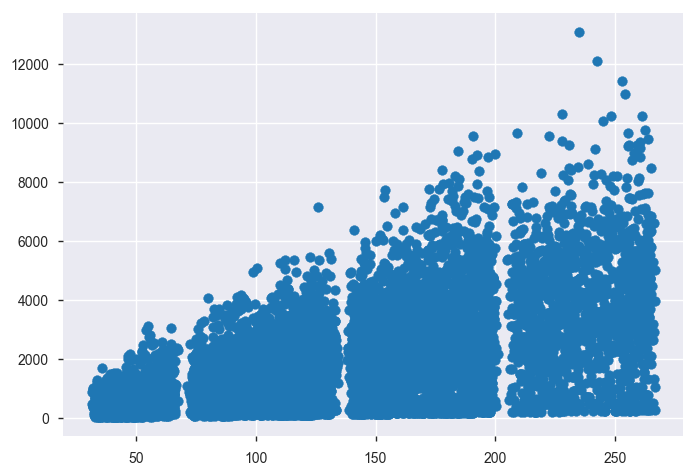

In [420]:
scatterplot=sns.plt.scatter(bigmart_sales_train['Item_MRP'],bigmart_sales_train['Item_Outlet_Sales'])

In [293]:
scatterplot

In [527]:
def mrpgroups(x):
    if x <69:
        x="1"
    elif (69<=x<136):
        x="2"
    elif (136<=x<203):
        x="3"
    else:
        x="4"
    return(x)
        

In [528]:
bigmart_sales['Item_MRP_Groups']=bigmart_sales['Item_MRP'].apply(lambda x: mrpgroups(x))

In [529]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_Groups
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,26.861204,4
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR,4,8.153581,1
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,8.092457,3
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train,perishable,FD,15,9.484115,3
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC,26,6.031512,1


Encode Categorical Variables

Why encoding categorical variables is essential?
Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).



In [424]:
#Label encoding for the categorical variables
#We will label encode Outlet_Size and Outlet_Location_Type as these are ordinal variables.
bigmart_sales_temp['Outlet_Size'] = bigmart_sales_temp['Outlet_Size'].replace('Missing', np.nan)


In [432]:
bigmart_sales.loc[bigmart_sales['Outlet_Size']=='Small']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_Groups
11,FD,FDA03,144.1102,2187.1530,Dairy,0.045464,18.500,1997,OUT046,Tier 1,Small,Supermarket Type1,Train,perishable,FD,16,7.789741,3rd
13,FD,FDS46,119.6782,2145.2076,Snack Foods,0.047257,17.600,1997,OUT046,Tier 1,Small,Supermarket Type1,Train,others,FD,16,6.799898,2nd
15,FD,FDP49,56.3614,1547.3192,Breakfast,0.069089,9.000,1997,OUT046,Tier 1,Small,Supermarket Type1,Train,perishable,FD,16,6.262378,1st
19,FD,FDU02,230.5352,2748.4224,Dairy,0.102492,13.350,2004,OUT035,Tier 2,Small,Supermarket Type1,Train,perishable,FD,9,17.268554,4th
22,Non-Edible,NCB30,196.5084,1587.2672,Household,0.025698,14.600,2004,OUT035,Tier 2,Small,Supermarket Type1,Train,non-persihable,NC,9,13.459479,3rd
23,FD,FDC37,107.6938,214.3876,Baking Goods,0.057557,15.500,1985,OUT019,Tier 1,Small,Grocery Store,Train,non-persihable,FD,28,6.947987,2nd
24,FD,FDR28,165.0210,4078.0250,Frozen Foods,0.025896,13.850,1997,OUT046,Tier 1,Small,Supermarket Type1,Train,non-persihable,FD,16,11.914874,3rd
26,FD,FDV10,42.3112,1065.2800,Snack Foods,0.066693,7.645,2004,OUT035,Tier 2,Small,Supermarket Type1,Train,others,FD,9,5.534493,1st
29,FD,FDC14,43.6454,125.8362,Canned,0.072222,14.500,1985,OUT019,Tier 1,Small,Grocery Store,Train,non-persihable,FD,28,3.010028,1st
34,DR,DRH01,174.8738,2085.2856,Soft Drinks,0.097904,17.500,1997,OUT046,Tier 1,Small,Supermarket Type1,Train,non-persihable,DR,16,9.992789,3rd


In [530]:
bigmart_sales['Outlet_Size']=bigmart_sales['Outlet_Size'].fillna('missing')

In [531]:
bigmart_sales_train1 = bigmart_sales_train.copy()

In [532]:
bigmart_sales_train1['Outlet_Size']=bigmart_sales_train1['Outlet_Size'].fillna('missing')

In [533]:
bigmart_sales_train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Train/Test
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


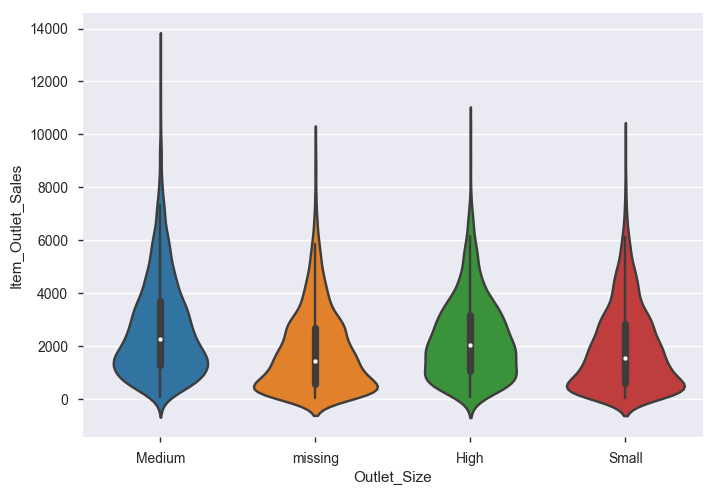

In [430]:
sns.violinplot(x=bigmart_sales_train1['Outlet_Size'],y=bigmart_sales_train1['Item_Outlet_Sales'],data=bigmart_sales_train1)

In [433]:
#Missing outlet size is very close to Small. Hence we will impute missing values in Outlet size with Small
def outletsize(x):
    if x=='missing':
        x='Small'
    else:
        x=x
    return(x)

#def outletsize(x):
#    if x=='small':
#        x='Small'
#    else:
#        x=x
#    return(x)


In [534]:
bigmart_sales['Outlet_Size']=bigmart_sales['Outlet_Size'].apply(lambda x: outletsize(x))

In [535]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_Groups
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,26.861204,4
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR,4,8.153581,1
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,8.092457,3
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Train,perishable,FD,15,9.484115,3
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC,26,6.031512,1


In [536]:
bigmart_sales.groupby('Outlet_Size').size().sort_values()

Outlet_Size
High      1553
Medium    4655
Small     7996
dtype: int64

#Encoding Categorical Variables
Why encoding categorical variables is essential?
Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label Encoding and One Hot Encoding.

Label encoding simply means converting each category in a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

In One hot encoding, each category of a categorical variable is converted into a new binary column (1/0).

In [537]:
bigmart_sales['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [538]:
#Convert outlet location type to categorical type
bigmart_sales["Outlet_Location_Type"] = bigmart_sales["Outlet_Location_Type"].astype('category')

In [539]:
bigmart_sales.dtypes

Item_Fat_Content               object
Item_Identifier                object
Item_MRP                      float64
Item_Outlet_Sales             float64
Item_Type                      object
Item_Visibility               float64
Item_Weight                   float64
Outlet_Establishment_Year       int64
Outlet_Identifier              object
Outlet_Location_Type         category
Outlet_Size                    object
Outlet_Type                    object
Train/Test                     object
Item_Type_new                  object
Item_category                  object
Outlet_Years                    int64
price_per_unit_wt             float64
Item_MRP_Groups                object
dtype: object

In [540]:
#Similarly convert Outlet size to categorical data type
bigmart_sales["Outlet_Size"] = bigmart_sales["Outlet_Size"].astype('category')

In [541]:
#Now we can assign the encoded variable to a new column using the cat.codes accessor
bigmart_sales["Outlet_Size_cat"] = bigmart_sales["Outlet_Size"].cat.codes
bigmart_sales["Outlet_Location_Type_cat"] = bigmart_sales["Outlet_Location_Type"].cat.codes
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_Groups,Outlet_Size_cat,Outlet_Location_Type_cat
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,26.861204,4,1,0
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,non-persihable,DR,4,8.153581,1,1,2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,perishable,FD,14,8.092457,3,1,0
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,Train,perishable,FD,15,9.484115,3,2,2
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,non-persihable,NC,26,6.031512,1,0,2


In [542]:
#Drop Outlet size and Outlet Location Type
bigmart_sales=bigmart_sales.drop(['Outlet_Size','Outlet_Location_Type'],axis=1)

In [543]:
bigmart_sales.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Type,Train/Test,Item_Type_new,Item_category,Outlet_Years,price_per_unit_wt,Item_MRP_Groups,Outlet_Size_cat,Outlet_Location_Type_cat
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Supermarket Type1,Train,perishable,FD,14,26.861204,4,1,0
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Supermarket Type2,Train,non-persihable,DR,4,8.153581,1,1,2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Supermarket Type1,Train,perishable,FD,14,8.092457,3,1,0
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Grocery Store,Train,perishable,FD,15,9.484115,3,2,2
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Supermarket Type1,Train,non-persihable,NC,26,6.031512,1,0,2


In [544]:
#One hot encoding for Item_fat_content,outlet_identifier,outlet_type,item_type_new,item_category,Item_MRP_groups,outlet_size_cat,
#outlet_location_type_cat
bigmart_sales=pd.get_dummies(bigmart_sales,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Type','Item_Type_new',
                                                   'Item_MRP_Groups','Outlet_Size_cat'])


In [545]:
bigmart_sales.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Train/Test,Item_category,Outlet_Years,...,Item_Type_new_non-persihable,Item_Type_new_others,Item_Type_new_perishable,Item_MRP_Groups_1,Item_MRP_Groups_2,Item_MRP_Groups_3,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,Train,FD,14,...,0,0,1,0,0,0,1,0,1,0
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,Train,DR,4,...,1,0,0,1,0,0,0,0,1,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,Train,FD,14,...,0,0,1,0,0,1,0,0,1,0
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,Train,FD,15,...,0,0,1,0,0,1,0,0,0,1
4,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,Train,NC,26,...,1,0,0,1,0,0,0,1,0,0


In [546]:
bigmart_sales=pd.get_dummies(bigmart_sales,columns=['Item_category'])

In [547]:
bigmart_sales=pd.get_dummies(bigmart_sales,columns=['Outlet_Location_Type_cat'])

In [548]:
bigmart_sales.columns.values

array(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Train/Test', 'Outlet_Years ', 'price_per_unit_wt ',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_new_non-persihable',
       'Item_Type_new_others', 'Item_Type_new_perishable',
       'Item_MRP_Groups_1', 'Item_MRP_Groups_2', 'Item_MRP_Groups_3',
       'Item_MRP_Groups_4', 'Outlet_Size_cat_0', 'Outlet_Size_cat_1',
       'O

PreProcessing Data

What is Data PreProcessing?
In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables

In [549]:
#keeep only the relevant and already transformed vars
bigmart_sales=bigmart_sales.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1)

In [550]:
bigmart_sales.columns.values

array(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Train/Test', 'Outlet_Years ', 'price_per_unit_wt ',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Non-Edible',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Type_new_non-persihable',
       'Item_Type_new_others', 'Item_Type_new_perishable',
       'Item_MRP_Groups_1', 'Item_MRP_Groups_2', 'Item_MRP_Groups_3',
       'Item_MRP_Groups_4', 'Outlet_Size_cat_0', 'Outlet_Size_cat_1',
       'Outlet_Size_cat_2', 'Item_category_DR', 'Item_category_FD',
       'I

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


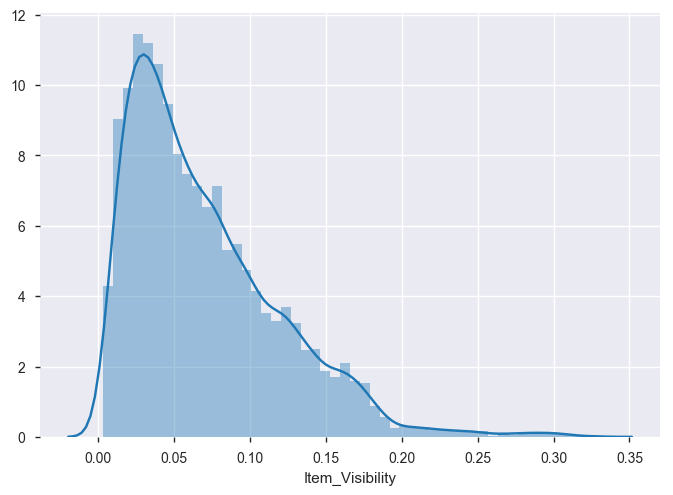

In [551]:
sns.distplot(bigmart_sales['Item_Visibility'])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


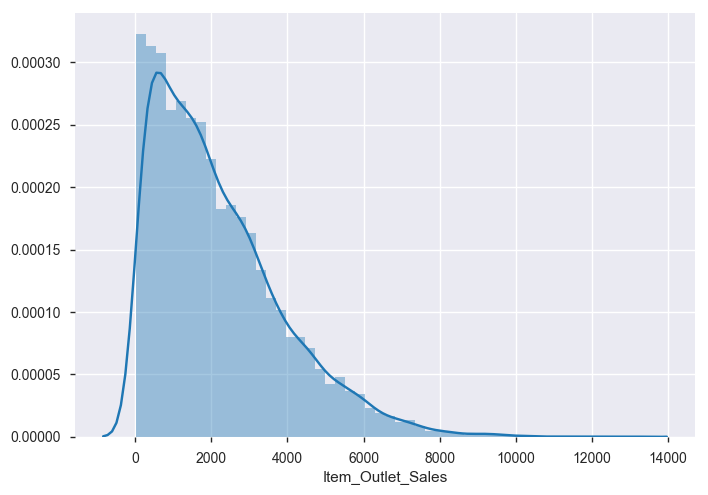

In [552]:
sns.distplot(bigmart_sales_train['Item_Outlet_Sales'])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


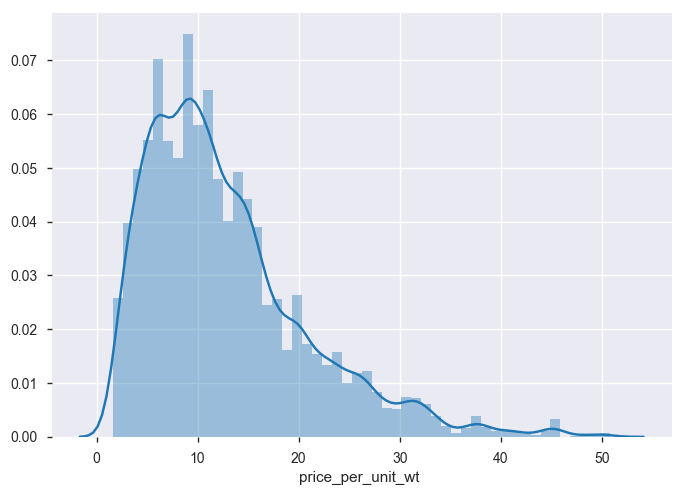

In [452]:
sns.distplot(bigmart_sales['price_per_unit_wt '])

Removing Skewness
Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility and price_per_unit_wt are highly skewed. So, we will treat their skewness with the help of log transformation.

In [553]:
#now transforming the Item_Visibility and price_per_unit_wt
bigmart_sales['Item_Visibility'] = np.log(bigmart_sales['Item_Visibility'])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


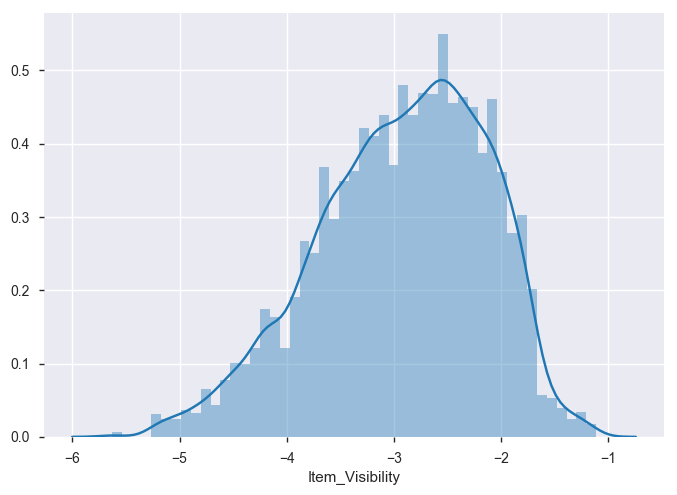

In [554]:
sns.distplot(bigmart_sales['Item_Visibility'])

In [555]:
df=bigmart_sales.loc[bigmart_sales['price_per_unit_wt ']==0]

In [556]:
df.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Train/Test,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2


In [557]:
bigmart_sales['price_per_unit_wt '] = np.log(bigmart_sales['price_per_unit_wt '])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


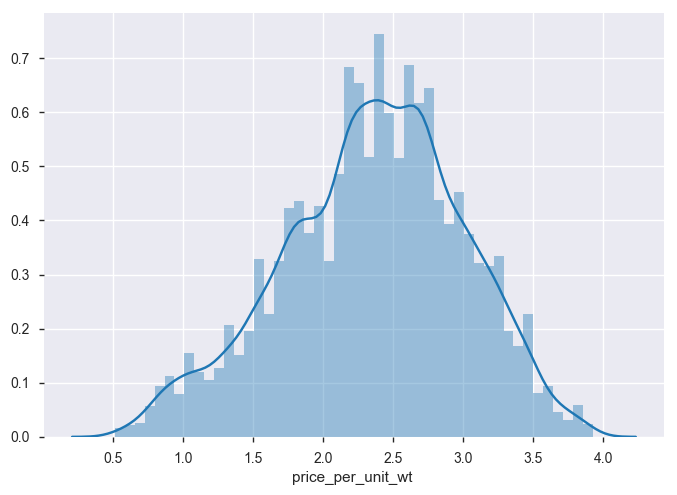

In [558]:
sns.distplot(bigmart_sales['price_per_unit_wt '])

Scaling numeric predictors
Let’s scale and center the numeric variables to make them have a mean of zero, standard deviation of one and scale of 0 to 1. Scaling and centering is required for linear regression models.

In [559]:
dict(bigmart_sales.dtypes)

{'Item_Fat_Content_Low Fat': dtype('uint8'),
 'Item_Fat_Content_Non-Edible': dtype('uint8'),
 'Item_Fat_Content_Regular': dtype('uint8'),
 'Item_MRP': dtype('float64'),
 'Item_MRP_Groups_1': dtype('uint8'),
 'Item_MRP_Groups_2': dtype('uint8'),
 'Item_MRP_Groups_3': dtype('uint8'),
 'Item_MRP_Groups_4': dtype('uint8'),
 'Item_Outlet_Sales': dtype('float64'),
 'Item_Type_new_non-persihable': dtype('uint8'),
 'Item_Type_new_others': dtype('uint8'),
 'Item_Type_new_perishable': dtype('uint8'),
 'Item_Visibility': dtype('float64'),
 'Item_Weight': dtype('float64'),
 'Item_category_DR': dtype('uint8'),
 'Item_category_FD': dtype('uint8'),
 'Item_category_NC': dtype('uint8'),
 'Outlet_Identifier_OUT010': dtype('uint8'),
 'Outlet_Identifier_OUT013': dtype('uint8'),
 'Outlet_Identifier_OUT017': dtype('uint8'),
 'Outlet_Identifier_OUT018': dtype('uint8'),
 'Outlet_Identifier_OUT019': dtype('uint8'),
 'Outlet_Identifier_OUT027': dtype('uint8'),
 'Outlet_Identifier_OUT035': dtype('uint8'),
 'Outl

In [560]:
numeric_var1 = [key for key in dict(bigmart_sales.dtypes) if dict(bigmart_sales.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

In [561]:
numeric_var1

['Item_MRP',
 'Item_Outlet_Sales',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Years ',
 'price_per_unit_wt ']

In [564]:
numeric_var1.remove('Item_Outlet_Sales')

In [565]:
numeric_var1

['Item_MRP',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Years ',
 'price_per_unit_wt ']

In [395]:
from scipy.stats import zscore

In [463]:
bigmart_sales.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Train/Test,Outlet_Years,price_per_unit_wt,Item_Fat_Content_DR,Item_Fat_Content_FD,Item_Fat_Content_Non-Edible,...,Item_MRP_Groups_4th,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
0,249.8092,3735.1380,-4.132215,9.30,Train,14,3.290683,0,1,0,...,1,0,1,0,0,1,0,1,0,0
1,48.2692,443.4228,-3.948780,5.92,Train,4,2.098457,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,141.6180,2097.2700,-4.088756,17.50,Train,14,2.090932,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,182.0950,732.3800,-3.775315,19.20,Train,15,2.249618,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,53.8614,994.7052,-4.221968,8.93,Train,26,1.796998,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [566]:
bigmart_sales_temp1=bigmart_sales.copy()

In [567]:
bigmart_sales_temp1.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Train/Test,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
0,249.8092,3735.1380,-4.132215,9.30,Train,14,3.290683,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,48.2692,443.4228,-3.948780,5.92,Train,4,2.098457,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,141.6180,2097.2700,-4.088756,17.50,Train,14,2.090932,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,182.0950,732.3800,-3.775315,19.20,Train,15,2.249618,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,53.8614,994.7052,-4.221968,8.93,Train,26,1.796998,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [569]:
bigmart_sales[numeric_var1]=bigmart_sales[numeric_var1].apply(zscore)

In [570]:
bigmart_sales.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Train/Test,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
0,1.752511,3735.1380,-1.538153,-0.751014,Train,-0.139681,1.448593,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,-1.493696,443.4228,-1.304556,-1.477653,Train,-1.334228,-0.394946,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.009874,2097.2700,-1.482810,1.011839,Train,-0.139681,-0.406582,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.661838,732.3800,-1.083656,1.377308,Train,-0.020226,-0.161206,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,-1.403623,994.7052,-1.652450,-0.830557,Train,1.293777,-0.861093,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [571]:
#Splitting the combined data combi back to train and test set.

bigmart_sales_train=bigmart_sales.loc[bigmart_sales['Train/Test']=='Train']

In [572]:
bigmart_sales_train.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Train/Test,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
0,1.752511,3735.1380,-1.538153,-0.751014,Train,-0.139681,1.448593,1,0,0,...,1,0,1,0,0,1,0,1,0,0
1,-1.493696,443.4228,-1.304556,-1.477653,Train,-1.334228,-0.394946,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0.009874,2097.2700,-1.482810,1.011839,Train,-0.139681,-0.406582,1,0,0,...,0,0,1,0,0,1,0,1,0,0
3,0.661838,732.3800,-1.083656,1.377308,Train,-0.020226,-0.161206,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,-1.403623,994.7052,-1.652450,-0.830557,Train,1.293777,-0.861093,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [573]:
bigmart_sales_test=bigmart_sales.loc[bigmart_sales['Train/Test']=='Test']

In [574]:
bigmart_sales_train=bigmart_sales_train.drop(['Train/Test'],axis=1)

In [575]:
bigmart_sales_test=bigmart_sales_test.drop(['Train/Test'],axis=1)

Correlated Variables
Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

negative correlation: < 0 and >= -1
positive correlation: > 0 and <= 1
no correlation: 0
It is not desirable to have correlated features if we are using linear regressions.

In [478]:
type(corr)

pandas.core.frame.DataFrame

In [578]:
corr=bigmart_sales_train.corr()
corr.style.background_gradient().set_precision(2)

In [577]:
corr.to_csv(path_or_buf='Correlation Matrix.csv')

Model Building

Finally we have arrived at most interesting stage of the whole process — predictive modeling. We will start off with the simpler models and gradually move on to more sophisticated models. We will start with the simpler linear models and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in the next sections.

Linear Regression
Lasso Regression
Ridge Regression
RandomForest
XGBoost
Evaluation Metrics for Regression
The process of model building is not complete without evaluation of model’s performance. That’s why we need an evaluation metric to evaluate our model. Since this is a regression problem, we can evaluate our models using any one of the following evaluation metrics:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

Mean Squared Error (MSE) is the mean of the squared errors:

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

At the competition’s page, it has been mentioned that our submission data would be evaluated based on the RMSE score. Hence, we will use RMSE as our evaluation metric.

Linear Regression

Linear regression is the simplest and most widely used statistical technique for predictive modeling. Given below is the linear regression equation:


where X1, X2,…,Xn are the independent variables, Y is the target variable and all thetas are the coefficients. Magnitude of a coefficient wrt to the other coefficients determines the importance of the corresponding independent variable.

For a good linear regression model, the data should satisfy a few assumptions which can be found in this article in detail. One of these assumptions is that of absence of multicollinearity, i.e, the independent variables should be correlated. However, as per the correlation plot above, we have a few highly correlated independent variables in our data. This issue of multicollinearity can be dealt with regularization.

For the time being, let’s build our linear regression model with all the variables. We will use 5-fold cross validation in all the models we are going to build. Basically cross vaidation gives an idea as to how well a model generalizes to unseen data.

In [579]:
#Normalize sales variable in training ds to remove skewness
bigmart_sales_train['ln_Item_Outlet_Sales'] = np.log(bigmart_sales_train['Item_Outlet_Sales'])

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


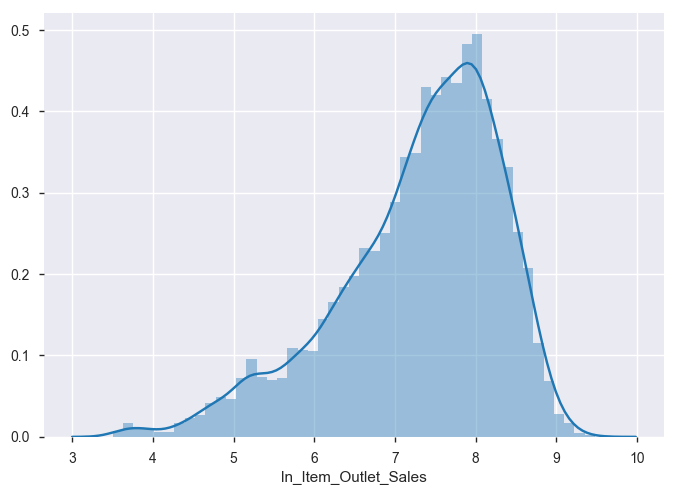

In [580]:
sns.distplot(bigmart_sales_train['ln_Item_Outlet_Sales'])

In [581]:
bigmart_sales_train.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,...,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2,ln_Item_Outlet_Sales
0,1.752511,3735.1380,-1.538153,-0.751014,-0.139681,1.448593,1,0,0,0,...,0,1,0,0,1,0,1,0,0,8.225540
1,-1.493696,443.4228,-1.304556,-1.477653,-1.334228,-0.394946,0,0,1,0,...,0,1,0,1,0,0,0,0,1,6.094524
2,0.009874,2097.2700,-1.482810,1.011839,-0.139681,-0.406582,1,0,0,0,...,0,1,0,0,1,0,1,0,0,7.648392
3,0.661838,732.3800,-1.083656,1.377308,-0.020226,-0.161206,0,0,1,1,...,0,0,1,0,1,0,0,0,1,6.596300
4,-1.403623,994.7052,-1.652450,-0.830557,1.293777,-0.861093,0,1,0,0,...,1,0,0,0,0,1,0,0,1,6.902446


In [605]:
bigmart_sales_test['Outlet_Identifier_OUT049'].head()

0    1
1    0
2    0
3    0
4    0
Name: Outlet_Identifier_OUT049, dtype: uint8

In [598]:
bigmart_sales_test=bigmart_sales_test.drop(['Item_Outlet_Sales'],axis=1)

In [600]:
bigmart_sales_test.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
0,-0.533831,-2.495833,1.710530,-0.139681,-1.091012,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,-0.864708,-0.426120,-0.965996,-1.095319,-0.000849,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,1.622763,0.786382,0.388391,-0.020226,0.700516,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
3,0.225966,-1.591545,-1.177753,-1.095319,1.082173,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,1.501577,1.009034,0.173409,1.532686,0.761341,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [584]:
X=bigmart_sales_train.drop(['Item_Outlet_Sales','ln_Item_Outlet_Sales'],axis=1)

In [585]:
y=bigmart_sales_train.ln_Item_Outlet_Sales

In [586]:
y

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
5       6.321863
6       5.839341
7       8.299724
8       6.981562
9       8.457557
10      7.323848
11      7.690356
12      7.371027
13      7.670992
14      7.589551
15      7.344279
16      7.391347
17      6.577024
18      7.742258
19      7.918782
20      8.236178
21      8.309934
22      7.369769
23      5.367786
24      8.313368
25      6.732101
26      6.970993
27      5.733119
28      5.184221
29      4.834981
          ...   
8493    8.461084
8494    7.401151
8495    8.369710
8496    8.220178
8497    7.717385
8498    7.378539
8499    7.998378
8500    7.553558
8501    7.318564
8502    8.013035
8503    8.129445
8504    8.328116
8505    7.657871
8506    8.280170
8507    6.246097
8508    7.858627
8509    6.051572
8510    8.879424
8511    8.344709
8512    7.815788
8513    6.388940
8514    6.150012
8515    7.359651
8516    6.755632
8517    8.191085
8518    7.929625
8519    6.308617
8520    7.0843

In [589]:
#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state = 123)

In [625]:
x_train.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Years ',
       'price_per_unit_wt ', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_new_non-persihable', 'Item_Type_new_others',
       'Item_Type_new_perishable', 'Item_MRP_Groups_1', 'Item_MRP_Groups_2',
       'Item_MRP_Groups_3', 'Item_MRP_Groups_4', 'Outlet_Size_cat_0',
       'Outlet_Size_cat_1', 'Outlet_Size_cat_2', 'Item_category_DR',
       'Item_category_FD', 'Item_category_NC', 'Outlet_Location_Type_ca

In [590]:
print(len(x_train))

5966


In [591]:
print(len(x_cv))

2557


In [592]:
print(len(y_train))

5966


In [593]:
print(len(y_cv))

2557


USING sklearn Library to build the model
sklearn library has a comprehensive set of APIs to split datasets, build models, test models and calculate accuracy metrics

In [594]:
## Building the model with train set and make predictions on test set. Output is not received in the same way as statslearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [595]:
linreg.coef_

array([ 2.17989745e-01,  2.78193005e-03,  1.84798439e-01, -1.43504263e-02,
        3.14702461e-01, -5.44735562e-03,  3.93967350e-03,  1.50768212e-03,
       -4.49036368e-01,  1.49963934e-02,  6.14601621e-02, -3.61240768e-03,
       -3.48477976e-01,  3.80093021e-01,  9.79136973e-02,  2.10374362e-02,
        3.57287157e-01, -1.31661115e-01, -7.97514344e-01,  4.21033730e-01,
       -3.61240768e-03,  3.80093021e-01, -3.11018158e-03,  1.29815036e-03,
        1.81203122e-03, -1.65970813e-01,  5.06897944e-02,  8.71324283e-02,
        2.81485906e-02,  1.49963934e-02,  2.44819498e-01, -2.59815892e-01,
       -4.41495490e-03,  4.75281402e-04,  3.93967350e-03, -1.22851935e-01,
        1.80411296e-01, -5.75593609e-02])

In [596]:
y_pred_train = linreg.predict(x_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_train) )
print(rmse_t)
print(metrics.r2_score( y_train, y_pred_train ))

0.5204185994547317
0.7364330879280256


In [597]:
y_pred_cv = linreg.predict( x_cv )
rmse = np.sqrt( metrics.mean_squared_error( y_pred_cv, y_cv ) )
print(rmse)
print(metrics.r2_score( y_cv, y_pred_cv ))

0.5197582497387928
0.7427817901932907


In [620]:
residuals = y_train - y_pred_train

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


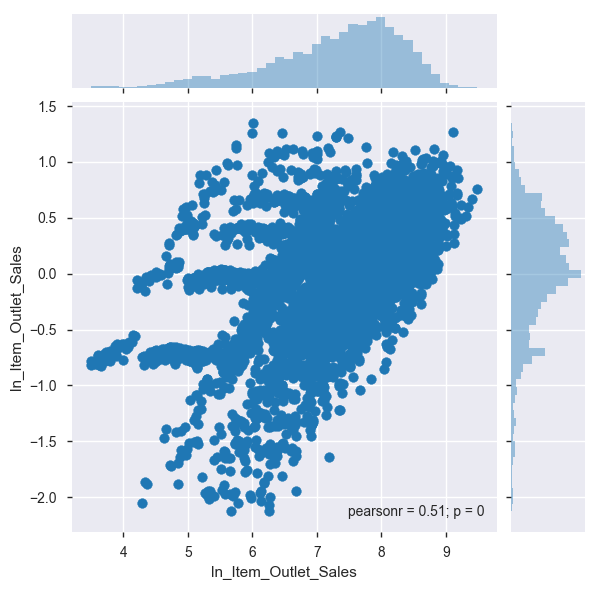

In [621]:
sns.jointplot(  y_train, residuals )

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


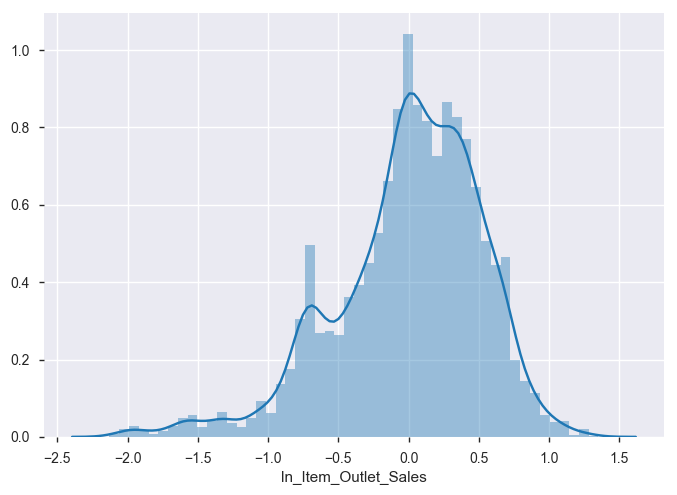

In [622]:
sns.distplot( residuals )

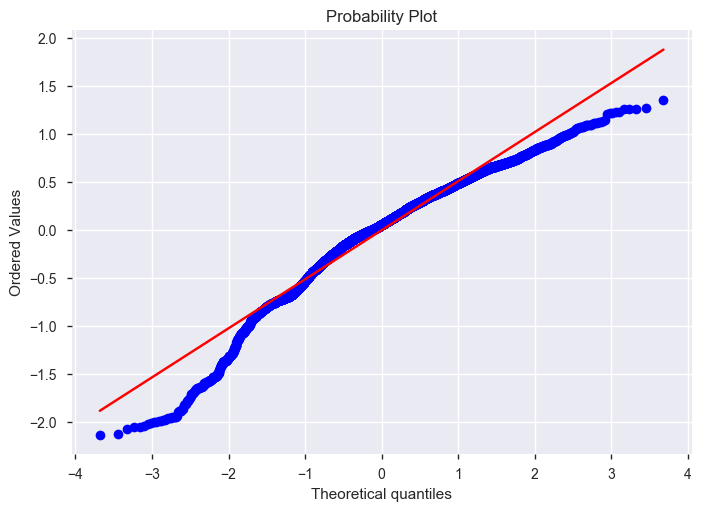

In [623]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [601]:
y_pred_test = linreg.predict( bigmart_sales_test )

In [614]:
type(y_pred_test)

numpy.ndarray

In [604]:
bigmart_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [606]:
#Merge predicted values with test file
bigmart_sales_test_original=pd.read_csv('Test_u94Q5KV.csv')

In [607]:
bigmart_sales_test_original.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [608]:
bigmart_submission['Item_Identifier']=bigmart_sales_test_original['Item_Identifier']

In [613]:
bigmart_submission['Outlet_Identifier']=bigmart_sales_test_original['Outlet_Identifier']

In [615]:
bigmart_submission['Item_Outlet_Sales']=y_pred_test

In [618]:
bigmart_submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1624.775377
1,FDW14,OUT017,1323.646533
2,NCN55,OUT010,495.303107
3,FDQ58,OUT017,2329.316640
4,FDY38,OUT027,5667.423880


In [617]:
bigmart_submission['Item_Outlet_Sales']=np.exp(bigmart_submission['Item_Outlet_Sales'])

In [619]:
bigmart_submission.to_csv('Submission-1.csv')

Leaderboard Score- 1178.744

We have got an RMSE of 1178.744 on the public leaderboard, but this score has been calculated by using only the 25% (public) of the test data (see evaluation metric) and we have no idea how this model will perform on the other 75% (private) of the test data. So, there has to be a system in place for us to check generalizability of our model, in other words, how consistently our model performs at unseen data or new data.

To check how robust our model is to unseen data, we’ll use Cross Validation. It is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for cross validation are listed below:

The validation set approach
k-fold cross validation
Leave one out cross validation (LOOCV)


In [626]:
### K-FOLD CROSS VALIDATION
from sklearn.cross_validation import cross_val_score

C:\Users\sandeep.ram\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [655]:
linreg = LinearRegression()

In [628]:
cross_val_score( linreg, x_train, y_train, scoring = 'r2', cv = 10 )

array([0.72436802, 0.75947303, 0.72260214, 0.7539037 , 0.76775457,
       0.69954496, 0.73343636, 0.7056924 , 0.72984516, 0.73365432])

In [629]:
round( np.mean( cross_val_score( linreg,
                              x_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.73

In [630]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [631]:
F_values, p_values  = f_regression(  x_train, y_train )

In [632]:
names = pd.concat([pd.Series(x_train.columns),
                  pd.Series(['%.3f' % p for p in F_values]),
                  pd.Series(['%.3f' % p for p in p_values])],axis=1)

In [635]:
names.columns=['Variable','F-value','P-value']

In [636]:
names

,Variable,F-value,P-value
0,Item_MRP,2122.614,0.000
1,Item_Visibility,120.455,0.000
2,Item_Weight,0.025,0.875
3,Outlet_Years,36.643,0.000
4,price_per_unit_wt,1383.331,0.000
5,Item_Fat_Content_Low Fat,0.442,0.506
6,Item_Fat_Content_Non-Edible,0.357,0.550
7,Item_Fat_Content_Regular,1.414,0.234
8,Outlet_Identifier_OUT010,1490.358,0.000
9,Outlet_Identifier_OUT013,25.113,0.000


In [644]:
#Vars to drop - Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,
#Outlet_Identifier_OUT018,Item_Type_new_perishable,Item_category_NC
X_train = x_train.drop(['Item_Weight','Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular',
                       'Outlet_Identifier_OUT018','Item_Type_new_perishable','Item_category_NC'],axis=1)
X_cv = x_cv.drop(['Item_Weight','Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular',
                       'Outlet_Identifier_OUT018','Item_Type_new_perishable','Item_category_NC'],axis=1)

In [639]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

array([0.72090141, 0.75951993, 0.72099722, 0.7515112 , 0.76570822,
       0.69880809, 0.73167536, 0.70406221, 0.72667922, 0.73309955])

In [641]:
linreg.fit( X_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [642]:
y_pred_train = linreg.predict(X_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_train) )
print(rmse_t)
print(metrics.r2_score( y_train, y_pred_train ))

0.522184934309496
0.7346409249535035


In [647]:
x_cv

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
4532,-1.610008,-2.568533,0.657118,-0.736955,-2.168374,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
186,0.398610,0.715092,-0.364046,1.532686,0.540711,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
7557,0.795909,-0.444209,1.087082,-0.139681,0.020645,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
6308,1.434520,0.208301,-0.600527,1.532686,1.209073,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
7297,0.240929,1.467547,1.173075,1.532686,-0.322276,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2711,-1.748403,0.890172,1.388057,0.099229,-2.832053,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7374,-0.875983,-0.848929,-1.400260,1.532686,0.417946,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
714,0.560489,-0.287798,1.699781,0.099229,-0.331900,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2886,-1.334446,-0.505303,1.302064,-0.498045,-1.897699,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
7559,0.551418,1.057003,-1.759280,-1.334228,1.985535,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [648]:
y_pred_cv = linreg.predict( X_cv )
rmse = np.sqrt( metrics.mean_squared_error( y_pred_cv, y_cv ) )
print(rmse)
print(metrics.r2_score( y_cv, y_pred_cv ))

0.5206359832535556
0.7419123102940612


In [650]:
bigmart_sales_test_it2=bigmart_sales_test.drop(['Item_Weight','Item_Fat_Content_Low Fat','Item_Fat_Content_Non-Edible','Item_Fat_Content_Regular',
                       'Outlet_Identifier_OUT018','Item_Type_new_perishable','Item_category_NC'],axis=1)

In [651]:
y_pred_test = linreg.predict( bigmart_sales_test_it2)

In [652]:
bigmart_submission['Item_Outlet_Sales']=y_pred_test

In [653]:
bigmart_submission['Item_Outlet_Sales']=np.exp(bigmart_submission['Item_Outlet_Sales'])

In [654]:
bigmart_submission.to_csv('Submission-2.csv')

In [656]:
cross_val_score( linreg, X_train, y_train, scoring = 'r2', cv = 10 )

array([0.72090141, 0.75951993, 0.72099722, 0.7515112 , 0.76570822,
       0.69880809, 0.73167536, 0.70406221, 0.72667922, 0.73309955])

In [657]:
round( np.mean( cross_val_score( linreg,
                              X_train,
                              y_train,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.73

In [658]:
F_values, p_values  = f_regression(  X_train, y_train )

In [659]:
names = pd.concat([pd.Series(X_train.columns),
                  pd.Series(['%.3f' % p for p in F_values]),
                  pd.Series(['%.3f' % p for p in p_values])],axis=1)

In [660]:
names.columns=['Variable','F-value','P-value']

In [661]:
names

,Variable,F-value,P-value
0,Item_MRP,2122.614,0.000
1,Item_Visibility,120.455,0.000
2,Outlet_Years,36.643,0.000
3,price_per_unit_wt,1383.331,0.000
4,Outlet_Identifier_OUT010,1490.358,0.000
5,Outlet_Identifier_OUT013,25.113,0.000
6,Outlet_Identifier_OUT017,33.973,0.000
7,Outlet_Identifier_OUT019,1476.536,0.000
8,Outlet_Identifier_OUT027,382.428,0.000
9,Outlet_Identifier_OUT035,53.371,0.000


In [663]:
X1_train=X_train.drop(['Outlet_Type_Supermarket Type2'],axis=1)

In [665]:
x1_cv=X_cv.drop(['Outlet_Type_Supermarket Type2'],axis=1)

In [666]:
linreg = LinearRegression()
linreg.fit( X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [667]:
y_pred_train = linreg.predict(X1_train)
rmse_t = np.sqrt( metrics.mean_squared_error( y_train, y_pred_train) )
print(rmse_t)
print(metrics.r2_score( y_train, y_pred_train ))

0.522184934309496
0.7346409249535035


Regularized Linear Regression

Regularised regression models can handle the correlated independent variables well and helps in overcoming overfitting. Ridge penalty shrinks the coefficients of correlated predictors towards each other, while the Lasso tends to pick one of a pair of correlated features and discard the other. The tuning parameter lambda controls the strength of the penalty.

In [668]:
#Lasso Regression

X=bigmart_sales_train.drop(['Item_Outlet_Sales','ln_Item_Outlet_Sales'],axis=1)

y=bigmart_sales_train.ln_Item_Outlet_Sales

#We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state = 123)

In [669]:
x_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Years,price_per_unit_wt,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Item_MRP_Groups_4,Outlet_Size_cat_0,Outlet_Size_cat_1,Outlet_Size_cat_2,Item_category_DR,Item_category_FD,Item_category_NC,Outlet_Location_Type_cat_0,Outlet_Location_Type_cat_1,Outlet_Location_Type_cat_2
1544,-0.156921,-0.130023,-1.575470,1.293777,1.275643,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
7932,-0.508102,-0.811969,0.818355,1.532686,-0.723232,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4654,0.216301,-1.598728,-1.177753,0.099229,1.076177,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4770,-0.260982,0.098873,0.764609,-0.020226,-0.496935,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
6283,-0.281879,-0.296280,-0.138315,-1.095319,-0.053999,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [670]:
from sklearn.linear_model import Lasso

In [675]:
lasso=Lasso()
lasso.

In [676]:
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
validation_score=lasso.score(x_cv,y_cv)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("validation score: ", validation_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)
train_score001=lasso001.score(x_train,y_train)
validation_score001=lasso001.score(x_cv,y_cv)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001) 
print ("validation_score for alpha =0.01: ",validation_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)
train_score00001=lasso00001.score(x_train,y_train)
validation_score00001=lasso00001.score(x_cv,y_cv)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001) 
print ("validation_score for alpha =0.0001: ", validation_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)


training score: 0.0
validation score:  -8.953576537740204e-06
number of features used:  0
training score for alpha=0.01: 0.7317662440060694
validation_score for alpha =0.01:  0.7392987903199532
number of features used: for alpha =0.01: 9
training score for alpha=0.0001: 0.736431726796641
validation_score for alpha =0.0001:  0.7427707698906307
number of features used: for alpha =0.0001: 25


LR training score: 0.7364330879280255
LR test score:  0.7427817901932907


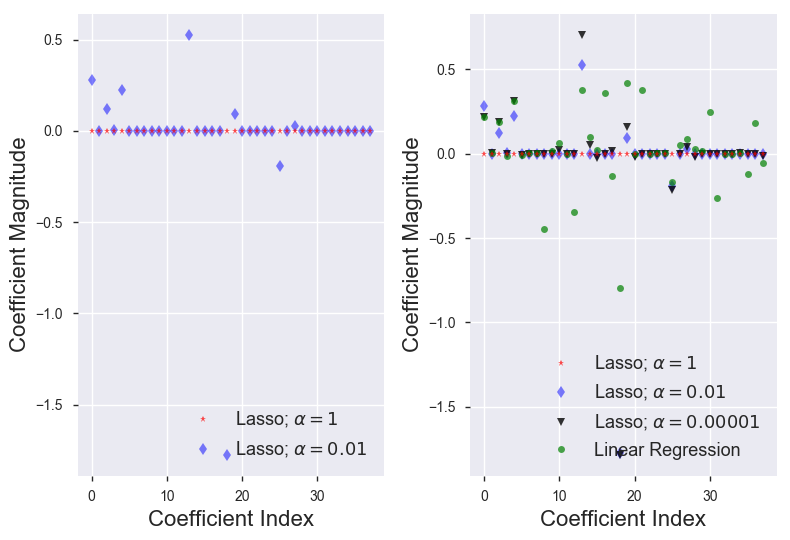

In [674]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_train_score=lr.score(x_train,y_train)
lr_validation_score=lr.score(x_cv,y_cv)
print("LR training score:", lr_train_score)
print ("LR test score: ", lr_validation_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [678]:
cross_val_score( lasso, x_train, y_train, scoring = 'r2', cv = 10 )

array([-1.83673107e-03, -6.97650079e-03, -4.31745566e-03, -2.55300788e-03,
       -1.05873447e-03, -4.52211636e-05, -8.90054535e-03, -6.46222792e-06,
       -1.11696865e-03, -1.61948291e-03])

In [ ]:
#Lets look at improving the model
